<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion2/blob/main/MH_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import scipy.stats as st
from itertools import accumulate
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def ptarget_uniform(x, y):
    if -1 <= x <= 1 and -1 <= y <= 1:
        return 1.0
    else:
        return 0.0

In [14]:
def metropolis_hastings(p, n, x0, y0, step):
    x = x0
    y = y0

    points = np.zeros((n, 2)) # Lista inicial de muestras, al momento, con puros ceros

    for i in range(n):

        # Proponemos nuevos valores para el estado actual mediante el muestreo Q(x',y' | x,y)
        x_star, y_star = np.array([x, y]) + np.random.uniform(-step,step,size=2)

        # Condición de Metropolis-Hastings
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star

        # Se actualiza la lista de muestras
        points[i] = np.array([x, y])

    return points

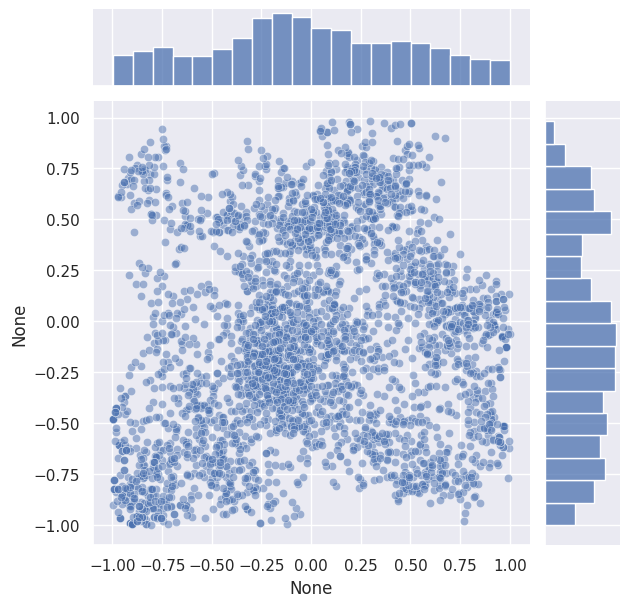

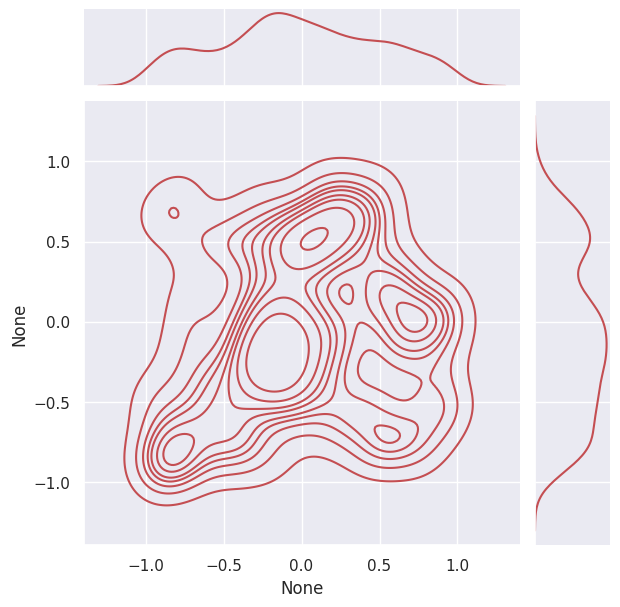

In [15]:
# Define the plot_dist function with scatter and kde
def plot_dist(x, y):
    # Gráfico de dispersión (scatter plot) para visualizar las muestras
    sns.jointplot(x=x, y=y, kind='scatter', color="b", alpha=0.5)

    # También puedes mantener el KDE para observar mejor la densidad
    sns.jointplot(x=x, y=y, kind='kde', color="r")

# Generar muestras con Metropolis-Hastings
samples_uniform = metropolis_hastings(ptarget_uniform, 3000, 0, 0, 0.1)

# Visualizar las muestras
plot_dist(samples_uniform[:, 0], samples_uniform[:, 1])
plt.savefig('uniform_samples.png')
